

# Project: Investigate a Dataset (TMDb Movie Dataset Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that will be analyzed in this report is the TMDB movie data containing information about 10,000 movies from The Movie Database (TMDB). The information includes rbudget, revenue, release dates, etc.. In this report, the data analysis process will be used to answer the following questions:

  - What are the top 5 movies with Highest Revenue?

  - Which Genre Has The Highest Release Of Movies?

  - In any year the largest number of movies were released ? 

  - The Average of runtime of the movies ?


> 

In [4]:
#Import the necessary Libraries for analysis 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()




<a id='wrangling'></a>
## Data Wrangling

>  In this section, I'll be loading the dataset then go through all data cleaning process needed to get the dataset ready for further analysis.

### General Properties

In [5]:
# Load the data 
df=pd.read_csv('tmdb-movies.csv')
#Prints the first 5 lines 
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Print a summary of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#display the number of (columns,rows)
df.shape

(10866, 21)

In [8]:
#To present a describtive summary of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Cleaning 
- Remove any duplicate rows.
- Removing unused columns.
- Changing the release date column into standard date format.
- Remove any null values
- Remove zero value fron runtime, budget, and revenue


## 1-Removing Data Duplication

In [9]:
#check if there is a duplicate value 
sum(df.duplicated())


1

In [10]:
##To remove duplication and check again
df.drop_duplicates(inplace=True)
sum(df.duplicated())


0

There is no duplicated value in the dataset

## 2-Removing Unused columns
Columns that we need to delete are homepage, cast, tagline, overview

In [11]:
#Droppd the unused columns
df.drop(['homepage', 'cast', 'tagline', 'overview'], axis = 1, inplace = True)

In [12]:
#To show the new columns set after removing the unused columns
df.columns



Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

## 3-Changing the release date column into standard date format

In [13]:
#convert release_data (Object) into data time 
df['release_date']=pd.to_datetime(df['release_date'])

#To see the change reflected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.5+ MB


## 4-Delete Null Values


In [14]:
# I'll check how many null values in the data set. 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
#Drop rows that contain null values in genres and production_companies

df['genres'] = df['genres'].replace(0,np.NaN)

df.dropna(inplace =True)

#Checking the data after removing null values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

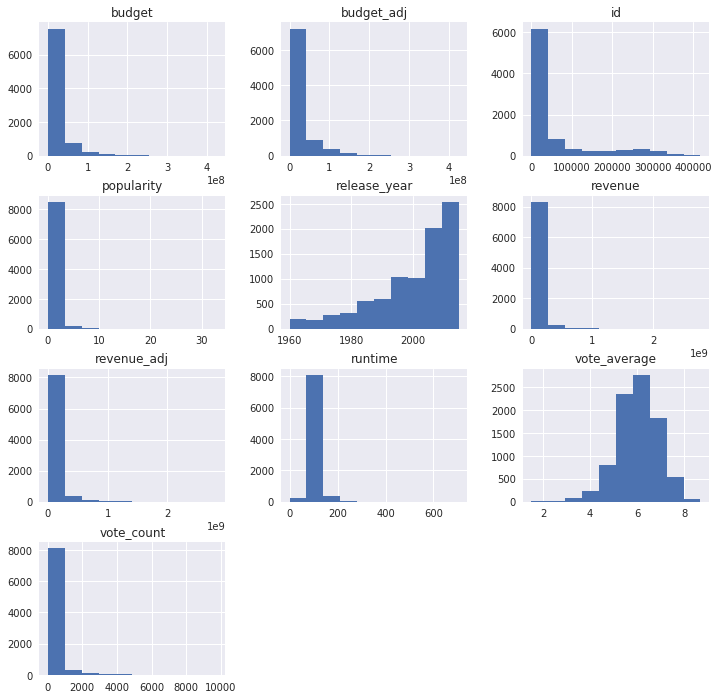

In [16]:
#View overall distribution of the dataset
df.hist(figsize=(12,12));

From above histograms, We can see that the minimum budget, revenue and runtime is 0. This is unreasonable in a real time scenario. So we need to clean this invalid data, I'll delete zero values from the data but it may affect the accuracy of the data .

## 5-Removing zero value from runtime,budget and revenue

In [17]:
clean_data = df.query('runtime == 0 or budget == 0 or revenue == 0').index
df.drop(clean_data, axis=0, inplace=True)

print("Number of zero values in Runtime Column:",df[(df['runtime']==0)].shape[0])
print("Number of zero values in The Budget Column:",df[(df['budget']==0)].shape[0])
print("Number of zero values in The Revenue Column:",df[(df['revenue']==0)].shape[0])




Number of zero values in Runtime Column: 0
Number of zero values in The Budget Column: 0
Number of zero values in The Revenue Column: 0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the top 5 movies with Highest Revenue? )

In [18]:
#It shows the 5 highest earning movies
Revenue1 = pd.DataFrame(df.nlargest(5,'revenue')[['budget','revenue','original_title']]).set_index('original_title');
#To display 5 rows
Revenue1.head(5)

,budget,revenue
original_title,,
Avatar,237000000,2781505847
Star Wars: The Force Awakens,200000000,2068178225
Titanic,200000000,1845034188
The Avengers,220000000,1519557910
Jurassic World,150000000,1513528810


Avatar is the movie that has the highest Revenue, and then Star Wars.

### Research Question 2  (Which Genre Has The Highest Release Of Movies?)

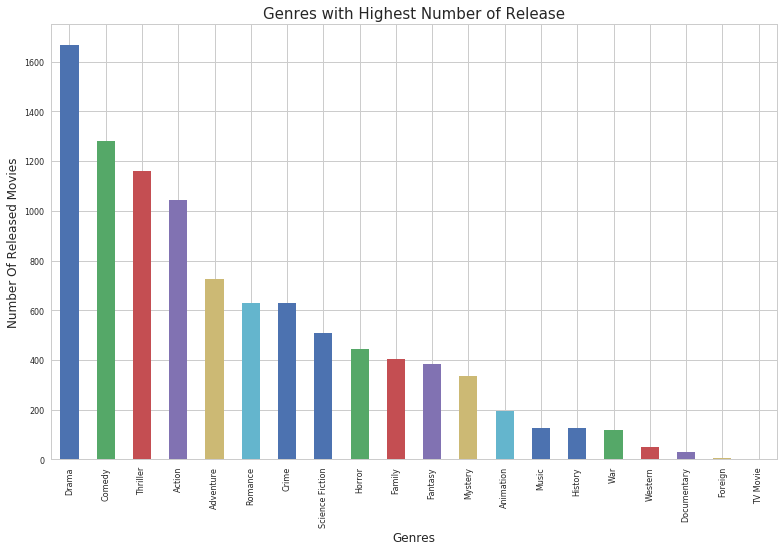

In [20]:
#split 'genres' and return the count of each genre.
def count_genres(x):
    #concatenate all the rows of the genrs.
    data_plot=df[x].str.cat(sep = '|')
    data= pd.Series(data_plot.split('|'))
    
    gen= data.value_counts(ascending=False)
    return gen

#counting the movies for each genre
total= count_genres('genres')
total=total.plot(kind= 'bar',figsize = (13,8),fontsize=8)

total.set_title("Genres with Highest Number of Release",fontsize=15)
total.set_xlabel("Genres",fontsize=12)
total.set_ylabel("Number Of Released Movies",fontsize= 12)
sns.set_style("whitegrid")

From the above Bar chart, we can observe that Drama genre has the highest release of movies more than 1600 released movies, then Comedy genre more than 1200 movies.

### Research Question 3 (In any year the largest number of movies were released ? )


In [16]:
# I used groupby to make group for each year and count the number of movies in each year
#data = df.groupby('release_year').count()['id']
#data
data=df.groupby('release_year').count()['id']
print(data)





release_year
1960      4
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     16
1979     16
1980     23
1981     29
1982     26
1983     31
1984     41
1985     39
1986     47
1987     45
1988     55
1989     50
1990     52
1991     49
1992     52
1993     70
1994     61
1995     78
1996     82
1997     86
1998     89
1999    111
2000    100
2001    114
2002    121
2003    116
2004    139
2005    157
2006    163
2007    149
2008    153
2009    166
2010    167
2011    192
2012    146
2013    164
2014    159
2015    155
Name: id, dtype: int64


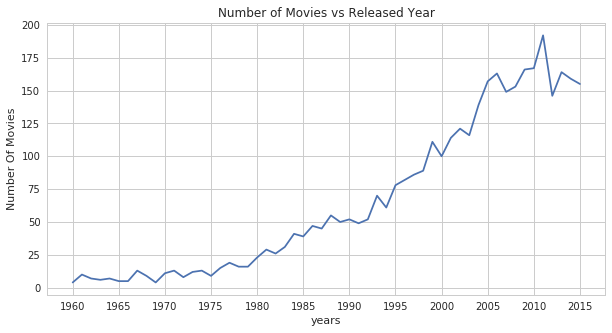

In [99]:

#I used groupby between release_year and movies to know which year has max movies released.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number of Movies vs Released Year")
plt.xlabel('years')
plt.ylabel('Number Of Movies')
#set the style sheet
sns.set_style("whitegrid")


We can conclude that the year 2014 has the highest release of the number of movies with 546 movies, then 2013 with 456, 
2014 exceeds 2013 with 67 movies.

### Research Question 3 (The Average of runtime of the movies ? )


In [101]:
# defining a function to find average of a column
def avg_function(column):
    return df[column].mean()

#calling function
avg_function('runtime')

109.56102201685241

We can see the Average of runtime of the movies is 109 minutes.

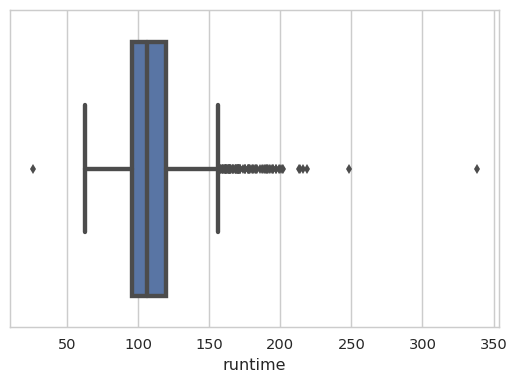

In [106]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(6,4), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)

#diplaying the plot
plt.show()

<a id='conclusions'></a>
## Conclusions

- Movies that made highest revenue is Avatar, and then Star Wars and then Titanic.
- that Drama genre has the highest release of movies more than 1600 released movies, then Comedy genre more than 1200 movies.
- The highest release of the number of movies in year 2014
- Average duration of the movie must be 109 minutes.

## Limitations:
In data wrangling process, particularly in 'genres' columns there were more than one genre in the same row for each movie so I used '|' to split the data in data exploring step.

This analysis may not be 100% accurate due to null values and zero values, but all data cleaning have been performed to ensure the data is as clean and complete as possible.


In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0